In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss,classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor




In [2]:
train = pd.read_csv("train.csv",index_col = 0)

In [3]:
train.isnull().sum()

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10407 entries, 0 to 10406
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
 11  Hardness               10407 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


In [5]:
X = train.drop('Hardness',axis = 1)
y = train[['Hardness']]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

##Grid SearchCV

In [8]:
dtr = DecisionTreeRegressor(random_state = 24)


params = {'min_samples_split':[2,3,4,5,6,10,25,50],
          'min_samples_leaf':[1,2,5,6,7,10,25,50],
          'max_depth':np.arange(2,15,1)
         }
kfold = KFold(n_splits = 5, shuffle = True, random_state = 24)
gcv = GridSearchCV(dtr,param_grid = params,scoring = 'r2',
                   cv = kfold, verbose = 3)

In [9]:
gcv.fit(X,y)

Fitting 5 folds for each of 832 candidates, totalling 4160 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.286 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.243 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.294 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.251 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.290 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.286 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.243 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.294 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.251 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1,

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=24),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': [1, 2, 5, 6, 7, 10, 25, 50],
                         'min_samples_split': [2, 3, 4, 5, 6, 10, 25, 50]},
             scoring='r2', verbose=3)

In [10]:
# print(gcv.best_params_)
# print(gcv.best_score_)

In [11]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 7, 'min_samples_leaf': 25, 'min_samples_split': 2}
0.4031662097041001


In [12]:
best_model = gcv.best_estimator_

In [13]:
df_imp = pd.DataFrame({'feature':list(X.columns),
             'importance': best_model.feature_importances_})

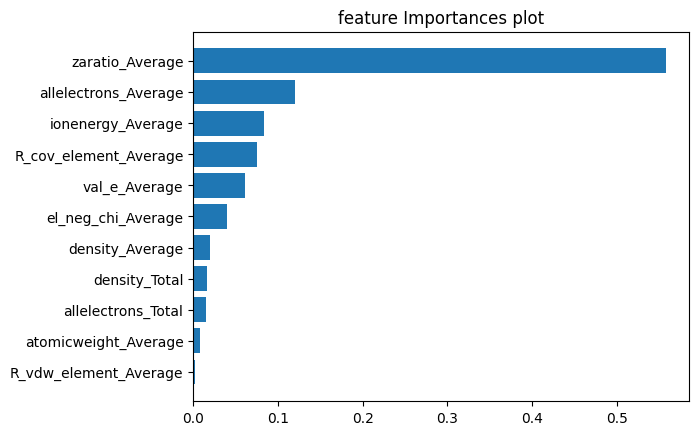

In [14]:
df_imp.sort_values('importance', inplace = True)
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title("feature Importances plot")
plt.show()

In [15]:
X_test = pd.read_csv("test.csv",index_col = 0)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6939 entries, 10407 to 17345
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     6939 non-null   float64
 1   density_Total          6939 non-null   float64
 2   allelectrons_Average   6939 non-null   float64
 3   val_e_Average          6939 non-null   float64
 4   atomicweight_Average   6939 non-null   float64
 5   ionenergy_Average      6939 non-null   float64
 6   el_neg_chi_Average     6939 non-null   float64
 7   R_vdw_element_Average  6939 non-null   float64
 8   R_cov_element_Average  6939 non-null   float64
 9   zaratio_Average        6939 non-null   float64
 10  density_Average        6939 non-null   float64
dtypes: float64(11)
memory usage: 650.5 KB


In [16]:
bm_gb = gcv.best_estimator_
y_pred = bm_gb.predict(X_test)

In [17]:
sample = pd.read_csv('sample_submission.csv')

In [18]:

sample['Hardness'] = y_pred
sample.to_csv('DTR_8_nov_1.csv',index=False)